In [2]:
!pip install -U control;

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as c

In [4]:
plt.rcParams['figure.figsize']=[18,8]
plt.rcParams['font.size'] = 24

In [5]:
G1=c.tf([2,5],[1,2,3])
G1

TransferFunction(array([2, 5]), array([1, 2, 3]))

In [6]:
G2=5*c.tf(np.poly([-2,-5]),np.poly([-4,-5,-9]))
G2

TransferFunction(array([ 5., 35., 50.]), array([  1.,  18., 101., 180.]))

In [7]:
c.minreal(G2)

1 states have been removed from the model


TransferFunction(array([ 5., 10.]), array([ 1., 13., 36.]))

In [8]:
G3=G1+G2
G3

TransferFunction(array([   7.,   86.,  427., 1070., 1050.]), array([  1.,  20., 140., 436., 663., 540.]))

In [9]:
G4=G1*G2
G4

TransferFunction(array([ 10.,  95., 275., 250.]), array([  1.,  20., 140., 436., 663., 540.]))

In [11]:
G5=G1/G2
G5


TransferFunction(array([  2.,  41., 292., 865., 900.]), array([  5.,  45., 135., 205., 150.]))

In [12]:
G_5=G2/G1
G_5

TransferFunction(array([  5.,  45., 135., 205., 150.]), array([  2.,  41., 292., 865., 900.]))

In [13]:
G6=c.feedback(G1,G2)
G6

TransferFunction(array([  2.,  41., 292., 865., 900.]), array([  1.,  20., 150., 531., 938., 790.]))

In [14]:
c.dcgain(G6)

1.139240506329114

In [15]:
c.pole(G6)

array([-7.04718677+0.j        , -5.0969239 +0.j        ,
       -5.        +0.j        , -1.42794466+1.53615211j,
       -1.42794466-1.53615211j])

In [16]:
c.zero(G6)

array([-9. +0.j, -5. +0.j, -4. +0.j, -2.5+0.j])

In [19]:
c.evalfr(G6,3.5+5j)

(0.22014864933783368-0.24741919236498242j)

In [20]:
G1

TransferFunction(array([2, 5]), array([1, 2, 3]))

In [22]:
G1_ss=c.tf2ss(G1)
G1_ss

StateSpace(array([[-2., -3.],
       [ 1.,  0.]]), array([[1.],
       [0.]]), array([[2., 5.]]), array([[0.]]))

In [23]:
G1_tf=c.ss2tf(G1_ss)
G1_tf

TransferFunction(array([2., 5.]), array([1., 2., 3.]))

In [24]:
A = [[0, 1, 0], [0, 0, 1], [-1, -2, -3]]
B = [[0], [0], [1]]
C = [1, 0, 0]
D = 0
sys7 = c.ss(A, B, C, D)

In [26]:
sys7_tf = c.ss2tf(sys7)
sys7_tf 

TransferFunction(array([8.8817842e-16, 8.8817842e-16, 1.0000000e+00]), array([1., 3., 2., 1.]))

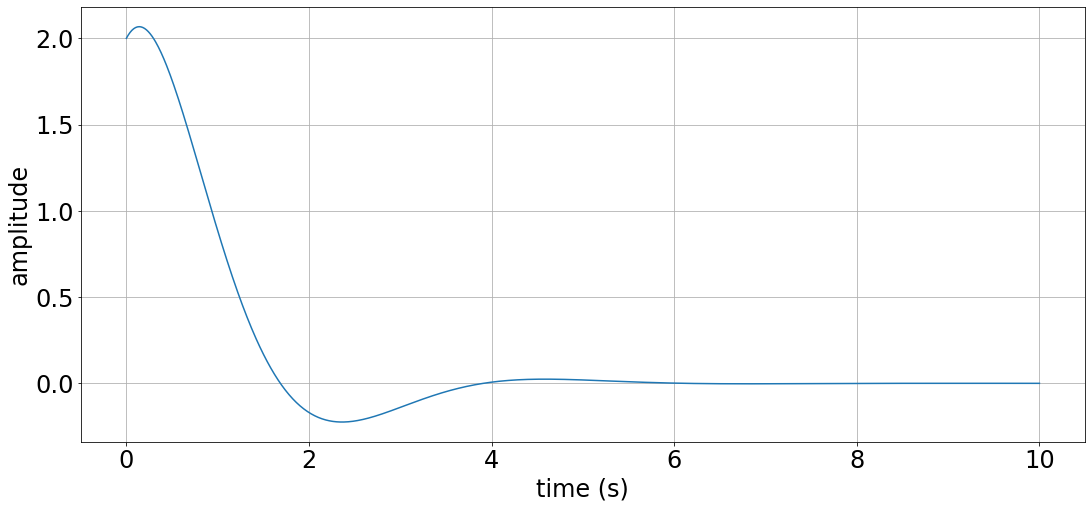

In [27]:
t = np.linspace(0, 10, 1000);
t1, y1 = c.impulse_response(G1, t)

plt.plot(t1, y1)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid()

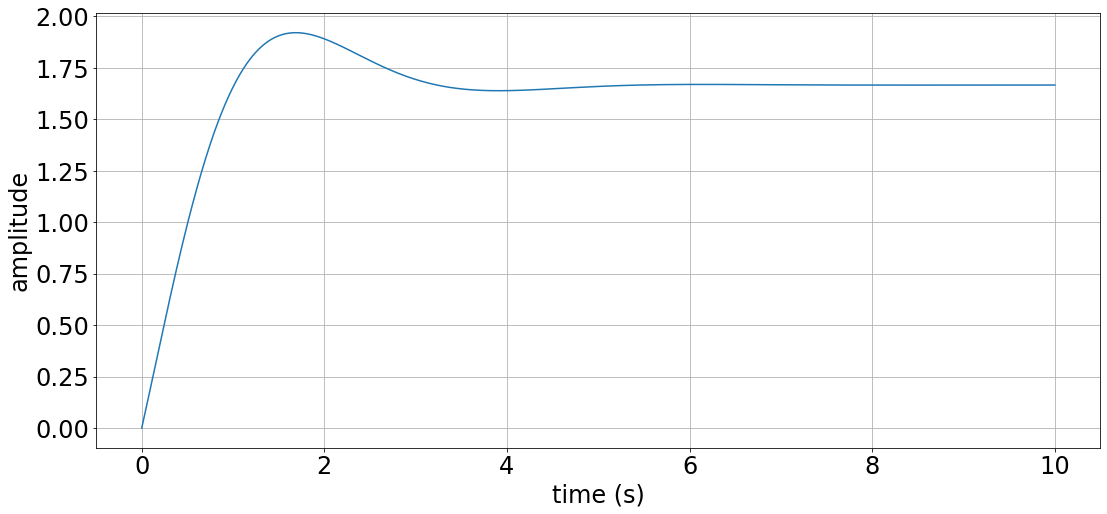

In [39]:
t = np.linspace(0, 10, 1000);
t1, y1 = c.step_response(G1, t)

plt.plot(t1, y1)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid()

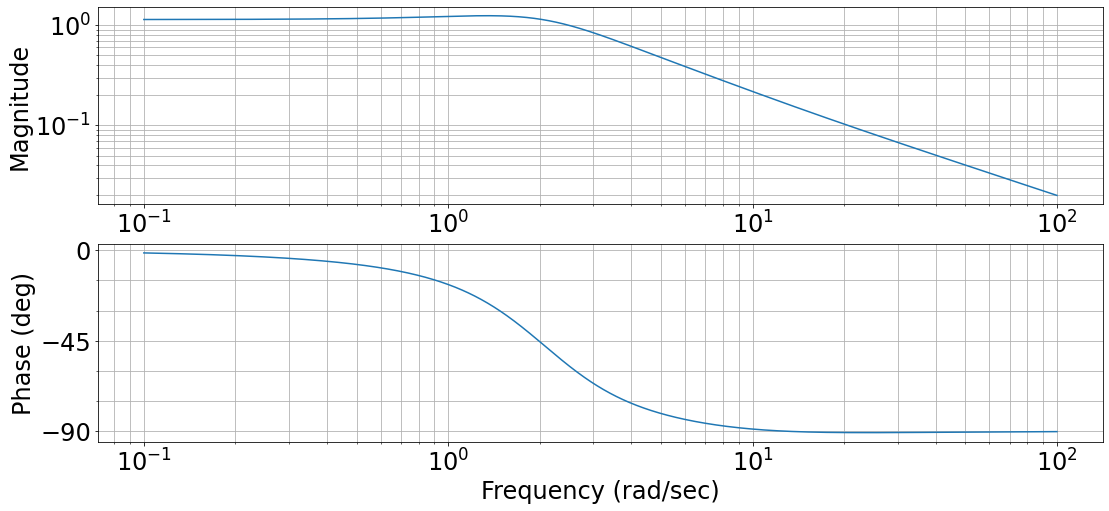

In [43]:
c.bode_plot(G6);

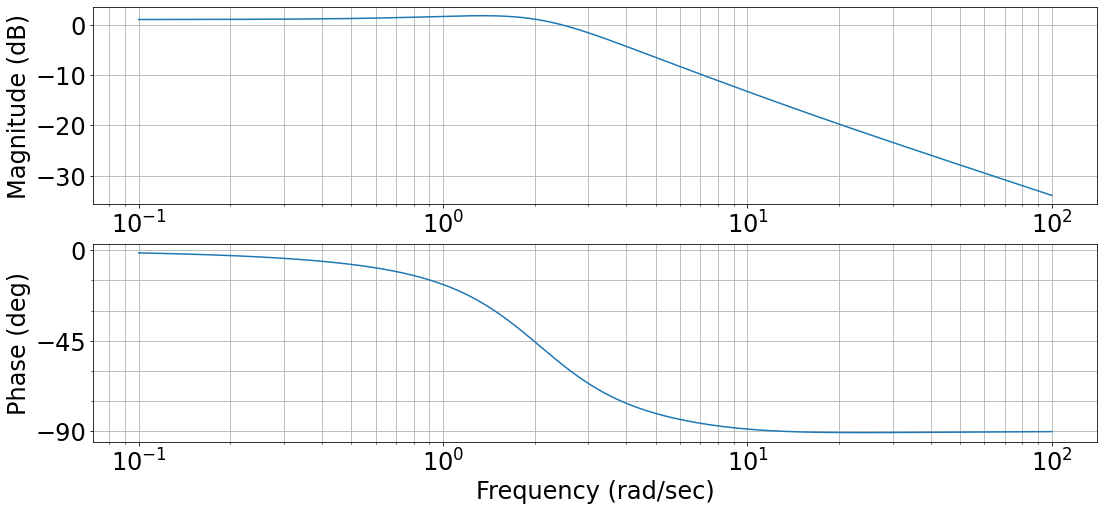

In [44]:
mag, phase, freq = c.bode_plot(G6, dB=True);

In [45]:
G = c.tf([10], [1, 2, 1])
G

TransferFunction(array([10]), array([1, 2, 1]))

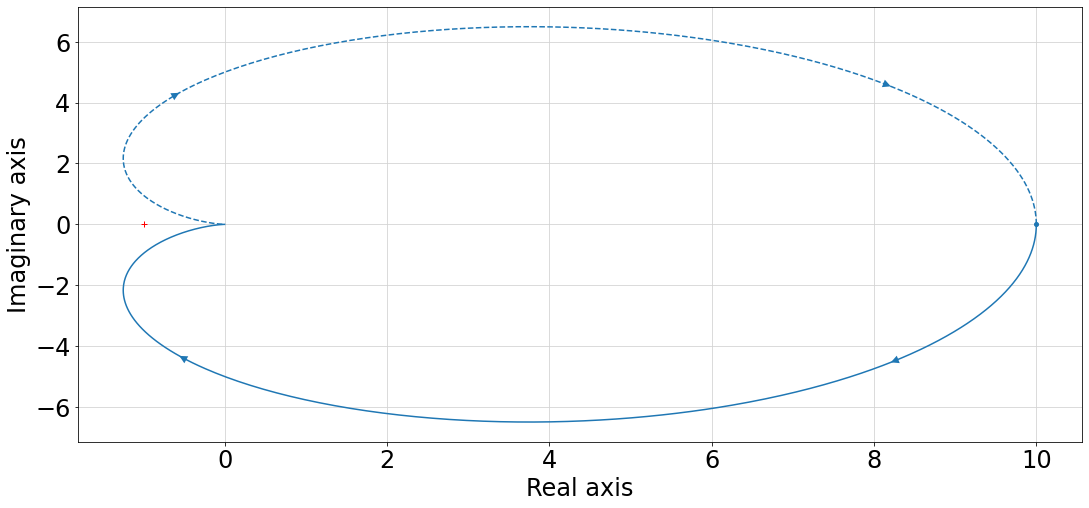

In [46]:
c.nyquist_plot(G);

In [47]:
G8 = c.tf([10], np.poly([-1, -2, -3]))
G8

TransferFunction(array([10]), array([ 1.,  6., 11.,  6.]))

In [48]:
GM, PM, _, PCF, GCF, _ = c.stability_margins(G8)
print(f'PCF = {PCF}, GM (abs) = {GM}, GCF = {GCF}, PM (deg) = {PM}')

PCF = 3.3166247903554, GM (abs) = 6.0, GCF = 1.0, PM (deg) = 90.0


In [49]:
G9 = c.tf([1], [1, 4, 5, 0])
G9

TransferFunction(array([1]), array([1, 4, 5, 0]))

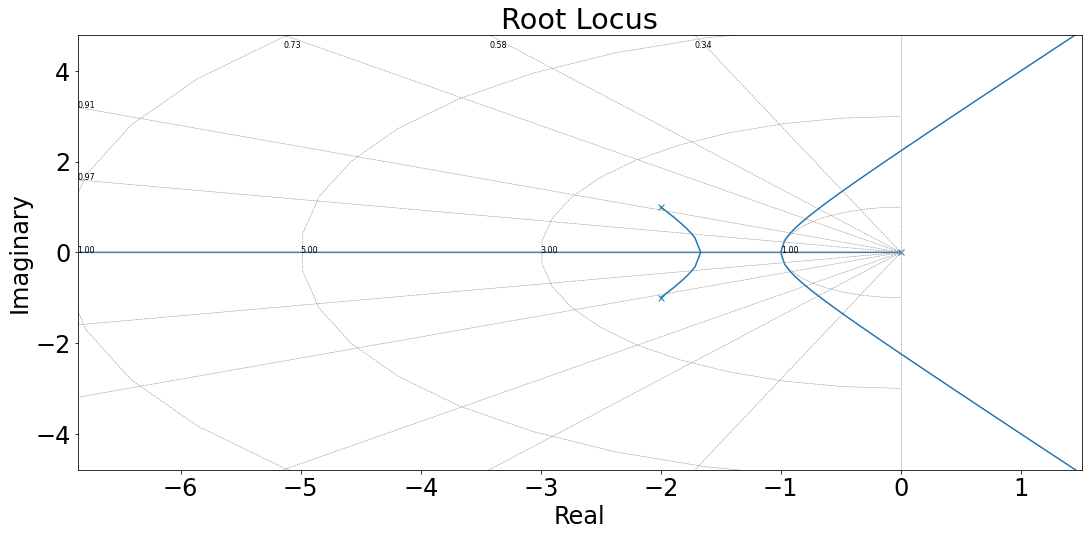

In [50]:
c.root_locus(G9);

In [51]:
M = c.ctrb(A, B)
M
  

array([[ 0.,  0.,  1.],
       [ 0.,  1., -3.],
       [ 1., -3.,  7.]])

In [52]:
np.linalg.matrix_rank(M)


3

In [53]:
N = c.obsv(A, C)
N

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [54]:
np.linalg.matrix_rank(N)


3

In [55]:

np.linalg.eigvals(A)

array([-2.32471796+0.j        , -0.33764102+0.56227951j,
       -0.33764102-0.56227951j])

In [56]:
c.place(A, B, [-1, -2, 3])

array([[-7., -9., -3.]])

In [57]:
sys7

<LinearIOSystem:sys[16]:['u[0]']->['y[0]']>

In [66]:
#import slycot
#from slycot import mb03rd
import mb03rd
c.canonical_form(sys7, 'modal')
     

ModuleNotFoundError: No module named 'mb03rd'

In [59]:
c.canonical_form(sys7, 'reachable')

(StateSpace(array([[-3., -2., -1.],
        [ 1.,  0.,  0.],
        [ 0.,  1.,  0.]]), array([[1.],
        [0.],
        [0.]]), array([[0., 0., 1.]]), array([[0.]])),
 array([[1.77635684e-15, 0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00, 0.00000000e+00]]))

In [71]:
c.canonical_form(sys7, 'observable')

(StateSpace(array([[-3.,  1.,  0.],
        [-2.,  0.,  1.],
        [-1.,  0.,  0.]]), array([[0.],
        [0.],
        [1.]]), array([[1., 0., 0.]]), array([[0.]])),
 array([[1., 0., 0.],
        [3., 1., 0.],
        [2., 3., 1.]]))

In [72]:
!pip install sympy

Defaulting to user installation because normal site-packages is not writeable

In [69]:
import sympy as sym
from sympy import exp
from sympy.abc import s,t,x,y,z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform
import math

In [70]:
U = laplace_transform(5*t, t, s)
print('U')
print(U[0])
# Result: 5/s**2
     

U
5/s**2


In [73]:
# Inverse Laplace transform (s->t)
X = inverse_laplace_transform(U[0],s,t)
print('X')
print(X)
# Result: 5*t*Heaviside(t)

X
5*t*Heaviside(t)


In [74]:
# Function
F = 5*(s+1)/(s+3)**2
print('F')
print(F)
# Result: (5*s + 5)/(s + 3)**2

F
(5*s + 5)/(s + 3)**2


In [75]:

# Partial fraction decomposition
G = sym.apart(F)
print('G')
print(G)
# Result: 5/(s + 3) - 10/(s + 3)**2

G
5/(s + 3) - 10/(s + 3)**2


In [76]:
d1 = (s+1)*(s+3)*(s**2+3*s+1)

In [77]:
d2 = sym.expand(d1)
print('d2')
print(d2)
# Result: s**4 + 7*s**3 + 16*s**2 + 13*s + 3
     

d2
s**4 + 7*s**3 + 16*s**2 + 13*s + 3


In [78]:
# find roots
print(sym.roots(d2))
# Result: {-1: 1, -3: 1, -3/2 - sqrt(5)/2: 1, -3/2 + sqrt(5)/2: 1}

{-1: 1, -3: 1, -3/2 - sqrt(5)/2: 1, -3/2 + sqrt(5)/2: 1}


In [80]:
# Laplace transform (t->s)
func = t * exp(-5*t)
U = laplace_transform(func, t, s)
print(U[0])
# Result: 5/s**2

(s + 5)**(-2)


In [83]:
print("GoodBye!")

GoodBye!
